In [1]:
import sys
sys.path.append("../Experiments/Utils/")
from Utils_Transitive_Annotation import *

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

rcParams = {'font.size': 20 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

def make_bars(probs, colors, ax, y):
    ax.bar(x = np.arange(1, len(probs)+1), height = np.array(probs), width = 1, color = 'grey', fill = True)
    ax.bar(x = np.arange(1, len(probs)+1), width = 1, height = 1, color = 'black', fill = False, linewidth = 1)
        
    ax.bar(x = np.arange(1, len(probs)+1), height = [1]*len(probs), bottom = 1, width = 1, color = colors, 
           fill = True, alpha = 0.5)
    ax.bar(x = np.arange(1, len(probs)+1), width = 1, height = 1, bottom = 1, color = 'black', fill = False,
           linewidth = 1)
        
    ax.set_ylim([0,2])
    ax.set_yticks([1])
    ax.set_yticklabels([y])
    ax.set_xlim([0.5, len(probs)+0.5])
    ax.set_xticks([])
    return ax

def Load_Artificial_Seqs(fdir):
    positions, classes, probs = [], [], []
    lines = open(fdir).readlines()
    for i in range(0, len(lines), 3):
        positions.append(lines[i].replace("\n","").split('\t')[1:])
        T = lines[i+1].replace("\n","").split("\t")[1:]
        classes.append(T)
        T = lines[i+2].replace("\n","").split('\t')[1:]
        O = []
        for x in T:
            O.append(float(x))
        probs.append(O)
    return positions, classes, probs


In [2]:
orig = '/Users/harihara/Mount/For_Noam/try2/Veillonellaceae/3928_5349_3382_932.csv'
taxa_colors = {'Allisonella':'orange', 'Dialister':'blue', 'Pilibacter':'brown', 'Blautia':'green'}
plots_dir = '/Users/harihara/Research-Activities/Plots/RDP_Outlier_Analysis/'
positions, taxa, probs = Load_Artificial_Seqs(orig)
path = 2

In [3]:
retrained = '/Users/harihara/Mount-2/projects/RDP_Outlier_Analysis/Dialister_Example/Path_'+str(path)+'/Test.taxa.out'
df_retrained = Parse_RDP_Output(retrained)
df_retrained = df_retrained[['genus', 'p-genus']].reset_index()
df_retrained['Path'] = df_retrained['Seq-ID'].apply(Extract_Parameter, filt="p")
df_retrained['Edits'] = df_retrained['Seq-ID'].apply(Extract_Parameter, filt="d")
df_retrained[['Path','Edits']] = df_retrained[['Path','Edits']].astype(int)
df_retrained = df_retrained.sort_values(by = ['Path','Edits'])
Series_retrained_taxa = df_retrained.groupby(['Path'])['genus'].apply(list).tolist()
Series_retrained_probs = df_retrained.groupby(['Path'])['p-genus'].apply(list).tolist()


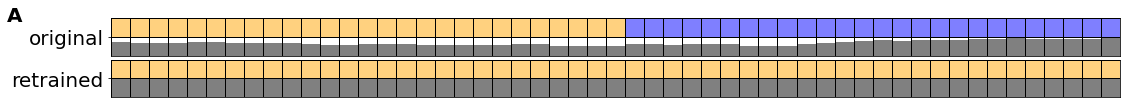

In [4]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(2, 1, figsize = (16,1.75))
taxa_comparison = [taxa[path], Series_retrained_taxa[path]]
probs_comparison = [probs[path], Series_retrained_probs[path]]
labels = ['original','retrained']
for i in range(0, len(taxa_comparison)):
    t = taxa_comparison[i]
    colors = []
    for x in t:
        try:
            colors.append(taxa_colors[x])
        except KeyError:
            colors.append('white')
    ax[i] = make_bars(probs_comparison[i], colors, ax[i], labels[i])
    
fig.tight_layout()
fig.text(0.015,0.8,'A', weight = 'bold')
plt.subplots_adjust(hspace=0.1)
fig.savefig(plots_dir+'Fig-2A.pdf')


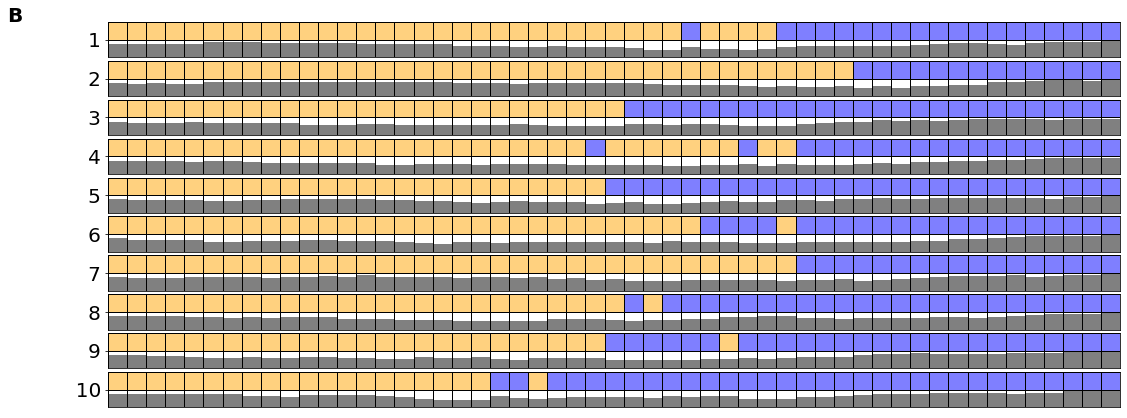

In [5]:
fig, ax = plt.subplots(10, 1, figsize = (16,6))
for i in range(0, len(taxa)):
    t = taxa[i]
    colors = []
    for x in t:
        try:
            colors.append(taxa_colors[x])
        except KeyError:
            colors.append('white')
    label = ' '*(12-len(str(i+1)))+str(i+1)
    ax[i] = make_bars(probs[i], colors, ax[i], label)
fig.tight_layout()
fig.text(0.015,0.95,'B', weight = 'bold')
plt.subplots_adjust(hspace=0.1)
fig.savefig(plots_dir+'Fig-2B.pdf')


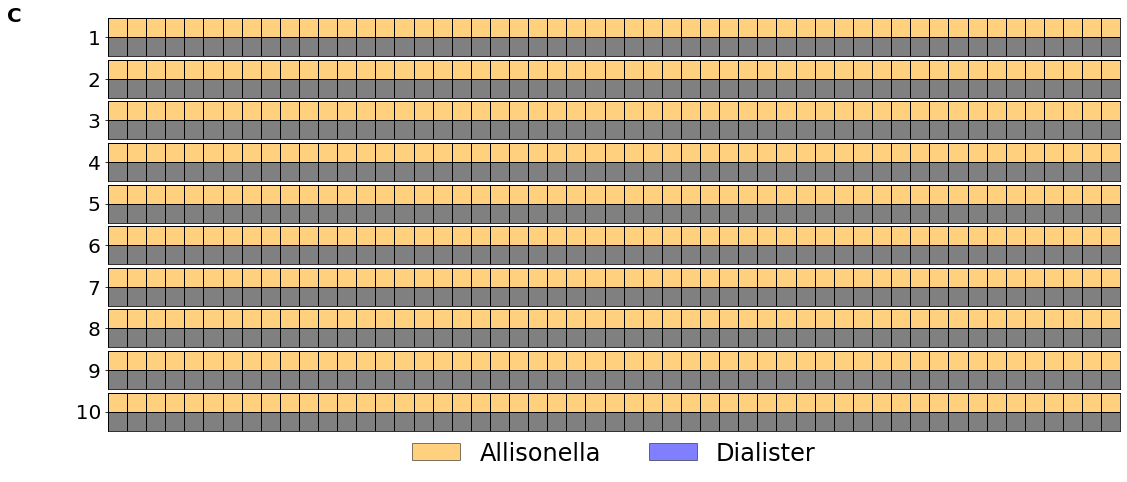

In [6]:
fig, ax = plt.subplots(11, 1, figsize = (16,7))
for i in range(0, len(Series_retrained_taxa)):
    t = Series_retrained_taxa[i]
    colors = []
    for x in t:
        try:
            colors.append(taxa_colors[x])
        except KeyError:
            colors.append('white')
    label = ' '*(12-len(str(i+1)))+str(i+1)
    ax[i] = make_bars(Series_retrained_probs[i], colors, ax[i], label)

custom_lines = [Patch(facecolor='orange', edgecolor='black',label='Allisonella', alpha = 0.5), 
                Patch(facecolor='blue', edgecolor='black',label='Dialister', alpha = 0.5)]
                #Patch(facecolor='brown', edgecolor='black',label='Pilibacter', alpha = 0.5),
                #Patch(facecolor='green', edgecolor='black',label='Blautia', alpha = 0.5),
                #Patch(facecolor='white', edgecolor='black',label='Other', alpha = 0.5)]

ax[10].legend(handles=custom_lines, loc='center', ncol = 5, frameon = False, fontsize = 24)
ax[10].set_xticks([])
ax[10].set_yticks([])
ax[10].set(frame_on=False)  # New

fig.tight_layout()
fig.text(0.015,0.95,'C', weight = 'bold')
plt.subplots_adjust(hspace=0.1)
fig.savefig(plots_dir+'Fig-2C.pdf')


In [8]:
for i in range(10):
    df_adv = Parse_RDP_Output('/Users/harihara/Mount-2/projects/RDP_Outlier_Analysis/Dialister_Example/Path_'+str(i)+'/Query.taxa.out')
    print(len(df_adv[df_adv['genus']=='Allisonella']), len(df_adv[df_adv['genus']=='Dialister']))

1951 215
2058 153
1951 215
1923 243
1959 209
1965 202
1982 186
1932 233
1935 231
1956 212


In [9]:
df = Parse_RDP_Output('/Users/harihara/Mount-2/projects/RDP_Outlier_Analysis/All3000.final.centers.out')
print(len(df[df['genus']=='Allisonella']), len(df[df['genus']=='Dialister']))

347 1811
